<a href="https://colab.research.google.com/github/Nicole-Smith841/Machine-Learning-Final-Project/blob/main/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Importing the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#Looking at the top 5 rows of the data
df = pd.read_csv("emissions.csv")
df.head()

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851


In [22]:
#Summarizing the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [23]:
#Summarizing the Data 2
df.describe()

,year,value
count,59901.000000,59901.000000
mean,1995.101067,35.647050
std,14.922049,207.883289
min,1970.000000,0.000022
25%,1982.000000,0.793179
50%,1995.000000,4.197628
75%,2008.000000,19.413459
max,2021.000000,5996.429314


In [24]:
#Checking for Null values
null_values = df.isnull().sum()
print(null_values)

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64


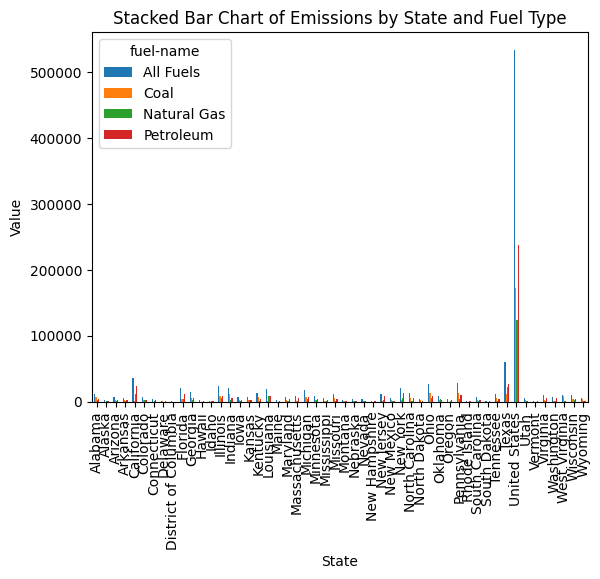

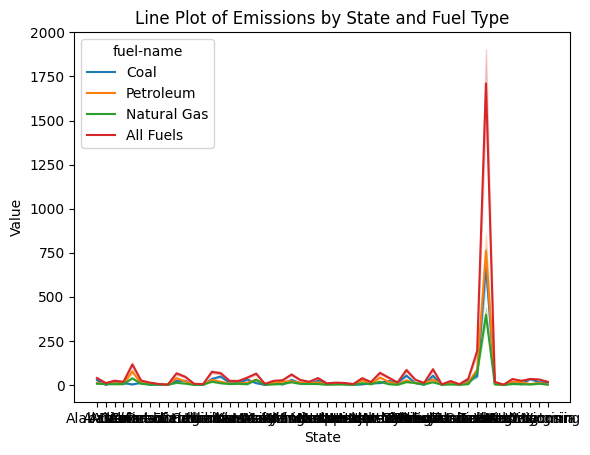

In [25]:
#Creating initial visualations
#Bar Chart
df_pivot = df.pivot_table(index='state-name',
                            columns='fuel-name',
                            values='value',
                            aggfunc='sum')
df_pivot.plot(kind='bar', stacked=False)
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Stacked Bar Chart of Emissions by State and Fuel Type')
plt.show()
#Line Chart
sns.lineplot(x='state-name', y='value', hue='fuel-name', data=df)
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Line Plot of Emissions by State and Fuel Type')
plt.show()


In [26]:
#Checking for Null values
null_values = df.isnull().sum()
print(null_values)

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64


In [27]:
#I have decided to drop the values of the 'United States' in the data frame, as I want to look at each state individually and not as a whole
index_of_us = df[df['state-name'] == 'United States'].index
df = df.drop(index_of_us)

In [29]:
#Z-Score normalization with the column 'Value'
scaler = StandardScaler()
df['Z-Score Normalized'] = scaler.fit_transform(df[['value']])
print("Z-Score Normalized Data using scikit-learn:")
print(df)

Z-Score Normalized Data using scikit-learn:
       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  Z-Score Normalized  
0 

In [35]:
#Linear Regression model
X = pd.get_dummies(df[['state-name', 'fuel-name']], drop_first=True)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1163.4029514823228
R-squared: 0.26858300363679855


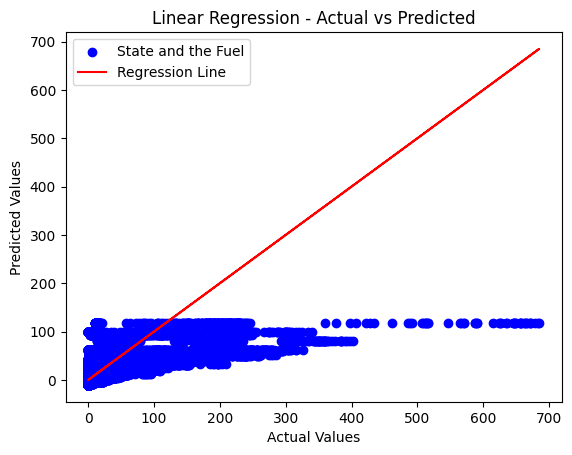

In [38]:

plt.scatter(y, model.predict(X), color='blue', label='State and the Fuel')
plt.plot(y, y, color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()